## Section 4: Charts and APIs
Your team decided to design a dashboard to display the statistic of COVID19 cases. You are tasked to display one of the components of the dashboard which is to display a visualisation representation of number of COVID19 cases in Singapore over time. 

Your team decided to use the public data from https://documenter.getpostman.com/view/10808728/SzS8rjbc#b07f97ba-24f4-4ebe-ad71-97fa35f3b683.

Display a graph to show the number cases in Singapore over time using the APIs from https://covid19api.com/.

In [53]:
import requests
import datetime
from pprint import pprint

url = 'https://api.covid19api.com/country/singapore/status/confirmed'

start_day = datetime.datetime.today() - datetime.timedelta(days=100)
end_day = datetime.datetime.today() - datetime.timedelta(days=90)

# from_string = f'{start_day.strftime("%Y-%m-%dT%H:%M:%SZ")}'
params = {
    "from": f'{start_day.strftime("%Y-%m-%dT00:00:00Z")}',
    "to": f'{end_day.strftime("%Y-%m-%dT00:00:00Z")}'
}

# sending get request and saving the response as response object
r = requests.get(url = url, params = params)
  
# extracting data in json format
data = r.json()

pprint(data)


[{'Cases': 1109744,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-04T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'confirmed'},
 {'Cases': 1119419,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-05T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'confirmed'},
 {'Cases': 1123886,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-06T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'confirmed'},
 {'Cases': 1128155,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-07T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'confirmed'},
 {'Cases': 1132169,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-08T00:00:00Z',
  'La

In [54]:
import requests
import datetime
from pprint import pprint

url = 'https://api.covid19api.com/country/singapore/status/recovered'

start_day = datetime.datetime.today() - datetime.timedelta(days=100)
end_day = datetime.datetime.today() - datetime.timedelta(days=90)

# from_string = f'{start_day.strftime("%Y-%m-%dT%H:%M:%SZ")}'
params = {
    "from": f'{start_day.strftime("%Y-%m-%dT00:00:00Z")}',
    "to": f'{end_day.strftime("%Y-%m-%dT00:00:00Z")}'
}

# sending get request and saving the response as response object
r = requests.get(url = url, params = params)
  
# extracting data in json format
data = r.json()

pprint(data)


[{'Cases': 0,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-04T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'recovered'},
 {'Cases': 0,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-05T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'recovered'},
 {'Cases': 0,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-06T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'recovered'},
 {'Cases': 0,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-07T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',
  'Province': '',
  'Status': 'recovered'},
 {'Cases': 0,
  'City': '',
  'CityCode': '',
  'Country': 'Singapore',
  'CountryCode': 'SG',
  'Date': '2022-04-08T00:00:00Z',
  'Lat': '1.35',
  'Lon': '103.82',

No recovered data is provided by API, can only plot daily confirmed cases. 

Active cases are also inaccurate, as it does not show recovered stats.

In [62]:
## Setting up the dataframe for analysis.

import requests
import pandas as pd

url = 'https://api.covid19api.com/total/country/singapore'

params = {
}

# sending get request and saving the response as response object
r = requests.get(url = url, params = params)
  
# extracting data in json format
data = r.json()

mydf = pd.DataFrame.from_records(data)
mydf['NewCases'] = mydf['Confirmed'].diff()
mydf['NewDeaths'] = mydf['Deaths'].diff()
mydf.sort_values('NewCases', ascending=False).head(5)

mydf['Date'] = pd.to_datetime(mydf['Date'])
plot_df = mydf.set_index('Date')


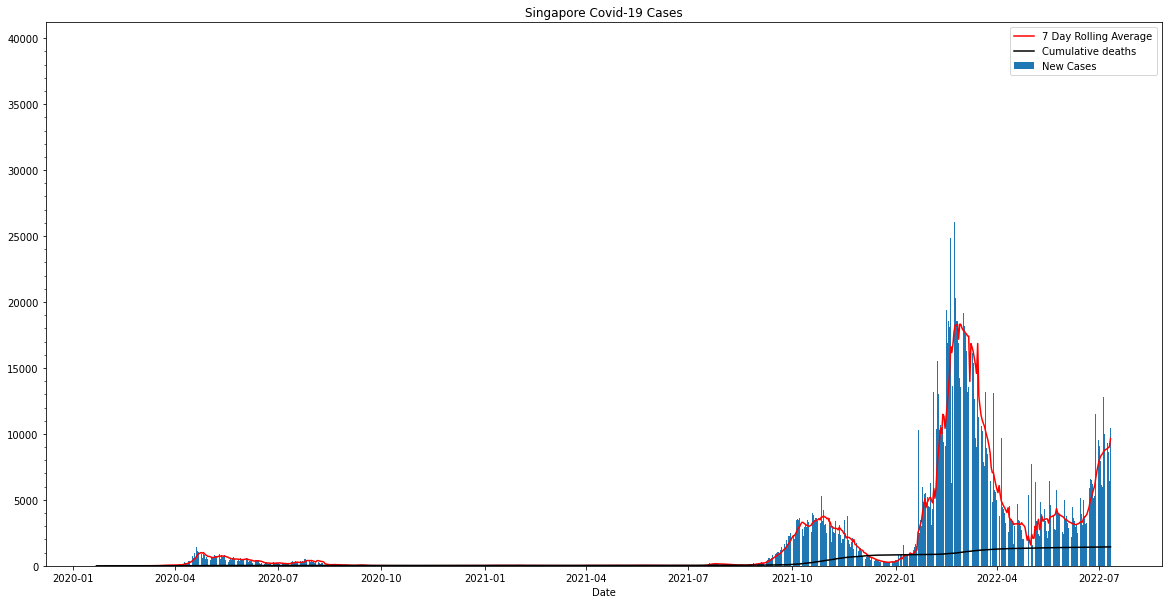

In [63]:
import matplotlib.pyplot as plt

plot_df['7day_average'] = plot_df['NewCases'].rolling(7).mean()
## Smaller window?
# plot_df = plot_df.loc['2020-03-01':'2020-06-01']

# Create Plot
plt.rcParams['figure.figsize']=(20,10)
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date') 
# Adding Twin Axes
# ax2 = ax1.twinx() 

ax1.bar(plot_df.index, plot_df['NewCases'], label='New Cases')
ax1.plot(plot_df.index, plot_df['7day_average'], color='red', label='7 Day Rolling Average')
ax1.plot(plot_df.index, plot_df['Deaths'], color='black', label='Cumulative deaths')

ax1.set_title('Singapore Covid-19 Cases')
ax1.legend()
ax1.set_yticks(list(range(0,40000,1000)),minor=True)

plt.show()


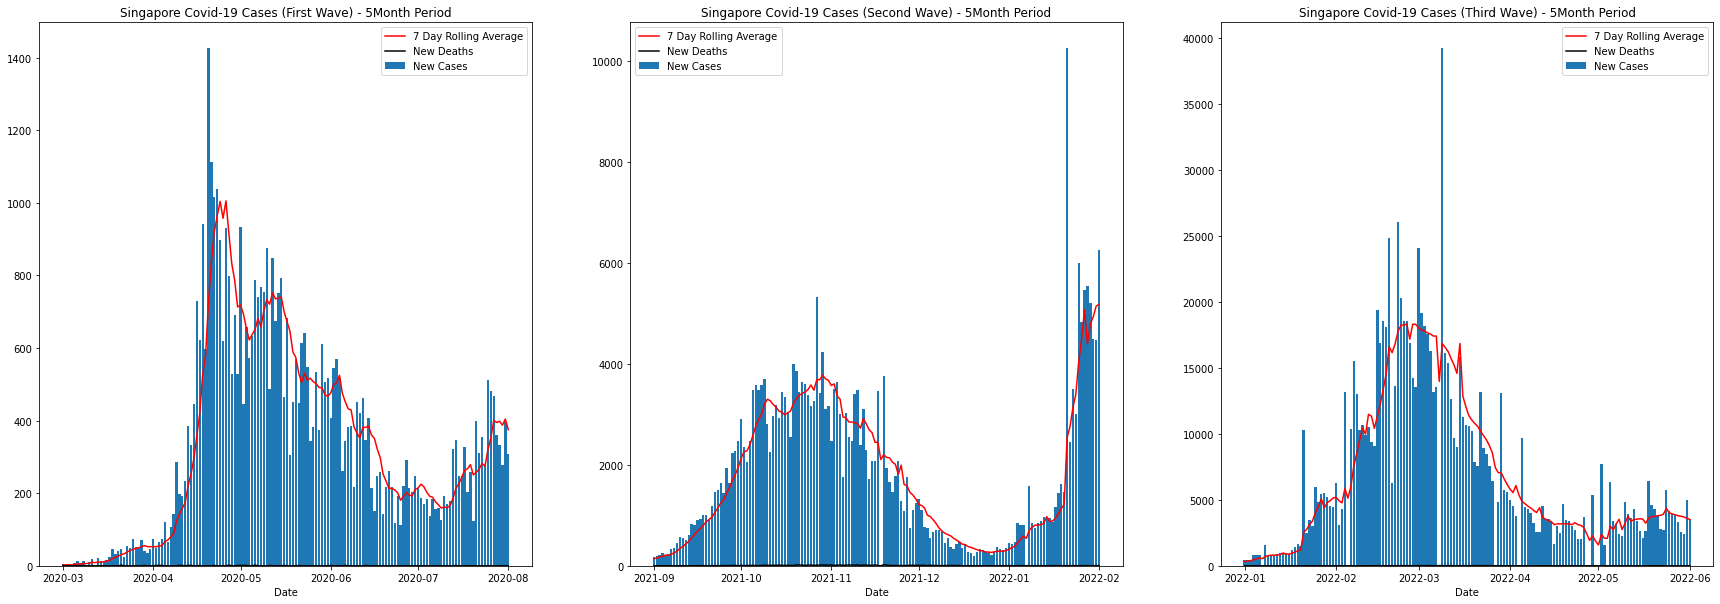

In [68]:
import matplotlib.pyplot as plt

mydf['plot_date'] = pd.to_datetime(mydf['Date'])
plot_df = mydf.set_index('plot_date')

plot_df['7day_average'] = plot_df['NewCases'].rolling(7).mean()
## Smaller window?
first_wave_df = plot_df.loc['2020-03-01':'2020-08-01'] # 5 months.
second_wave_df = plot_df.loc['2021-09-01':'2022-02-01'] #5 months for comparison
third_wave_df = plot_df.loc['2022-01-01':'2022-06-01'] #5 months for comparison

# Create Plot
plt.rcParams['figure.figsize']=(30,10)
fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
  
ax1.set_xlabel('Date') 
# Adding Twin Axes
# ax1_2 = ax1.twinx() 

ax1.bar(first_wave_df.index, first_wave_df['NewCases'], label='New Cases')
ax1.plot(first_wave_df.index, first_wave_df['7day_average'], color='red', label='7 Day Rolling Average')
ax1.plot(first_wave_df.index, first_wave_df['NewDeaths'], color='black', label='New Deaths')

ax1.set_title('Singapore Covid-19 Cases (First Wave) - 5Month Period')
ax1.legend()
# ax1.set_yticks(list(range(0,40000,1000)),minor=True)

## Subplot2
ax2.set_xlabel('Date') 
# Adding Twin Axes
# ax1_2 = ax1.twinx() 

ax2.bar(second_wave_df.index, second_wave_df['NewCases'], label='New Cases')
ax2.plot(second_wave_df.index, second_wave_df['7day_average'], color='red', label='7 Day Rolling Average')
ax2.plot(second_wave_df.index, second_wave_df['NewDeaths'], color='black', label='New Deaths')

ax2.set_title('Singapore Covid-19 Cases (Second Wave) - 5Month Period')
ax2.legend()
# ax1.set_yticks(list(range(0,40000,1000)),minor=True)

## Subplot3
ax3.set_xlabel('Date') 
# Adding Twin Axes
# ax1_2 = ax1.twinx() 

ax3.bar(third_wave_df.index, third_wave_df['NewCases'], label='New Cases')
ax3.plot(third_wave_df.index, third_wave_df['7day_average'], color='red', label='7 Day Rolling Average')
ax3.plot(third_wave_df.index, third_wave_df['NewDeaths'], color='black', label='New Deaths')

ax3.set_title('Singapore Covid-19 Cases (Third Wave) - 5Month Period')
ax3.legend()
# ax1.set_yticks(list(range(0,40000,1000)),minor=True)

plt.show()


Observations:

- First wave spiked alot faster, reaching peak within 1 month of transmission detection
- Subsequent waves spiked slower with a larger volume of infections
- Third wave corresponded with CNY? Came a lot faster than the waning from second wave. Maybe collaborate with tightning measures?